<a href="https://colab.research.google.com/github/AgnieszkaBorys/data-science-bootcamp/blob/master/ml2206_01_sn_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WYkorzystamy sieć neuronową do problemu regresji liniowej. Zazwyczaj tak się nie robi bo to zbyt trywialny problem dla siecie nuronowych

In [ ]:
url = 'http://hackingpython.pl/ML2206/Day04/f-c.csv'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# komponenty do budowania sieci
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  #konstruktor klasy Dense dla warstwy gęstej

In [ ]:
from tensorflow.random import set_seed
set_seed(0)

In [ ]:
# tworzenie sieci
#inicjacja sieci neuronowej
model = Sequential()  

# dodajemy warstwy:
# warstwa wejściowa - tutaj określamy ksztalt, czyli wymiary zmiennej X
model.add( Dense(16, input_shape=[1], activation='linear') )   # pierwszy param to liczba neuronów, activation - funkcja aktywacji

# warstwa ukryta -
model.add( Dense(4, activation='linear') )

# warstwa wyjściowa - podajemy tyle neuronów ile mamy kategorii odpowiedzi, dla regresji jest to 1 bo wynikiem (y) jest zmienna ciągła, dla rozpoznowania obrazow bedzie 10 tyle param obrazu
model.add( Dense(1) )

In [ ]:
# konpilacja sieci
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics='mean_squared_error') 
             # optymalizator, czyli alg ktory dopasowuje wagi, 
             # loss - funkcja straty, opisuje stopien dopasowania y pred do y real
             # metrics to dodatkowa metryka ktorą możemy obserwowac w procesie uczenia sie sieci, podawana w ouptpucie

In [ ]:
df = pd.read_csv(url, usecols=[1, 2])
df.head()

,F,C
0,-140.0,-95.55
1,-136.0,-93.33
2,-124.0,-86.66
3,-112.0,-80.00
4,-105.0,-76.11


In [ ]:
import matplotlib.pyplot as plt

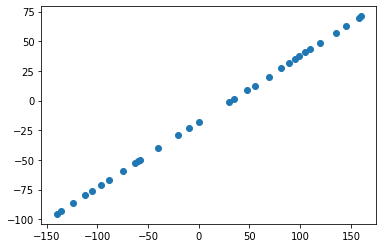

In [ ]:
_ = plt.scatter(df.F, df.C)

In [ ]:
result = model.fit(df.F.values, df.C.values, epochs=5000, verbose=0)  
                  # epochs - ilosc epok czyliprzebierow sieci, default = 1 
                  # verbose=2  ile epok ma być wyswietlonych w otpucie, 0 znaczy brak wyniki w out, jak nie podamy to wyświetli info o kazdej epoce
# Uwaga: jak puścimy model fit to nasz model bedzie juz 'nauczony'. Uruchomirenie ponowne da inny resultat. Trzeba zrobić restart.                  

In [ ]:
result.history.keys()

dict_keys(['loss', 'mean_squared_error'])

In [ ]:
df_test = pd.DataFrame(result.history['loss'])
df_test.tail()

,0
4995,1.557190
4996,1.554402
4997,1.556962
4998,1.554148
4999,1.556686


Uwaga: za kazdym razem przebieg sieci jest inny bo poczatkowo wagi wybierane są losowo. Ważne że na koniec wynik powinien zbiegać do porządanego, czyli funkcja loss zbiega do 0. To oznacza że proces uczenia jest za kazdym razem inny zaś rezultt powienien być zbliżony.

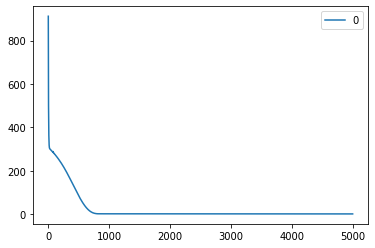

In [ ]:
df_test.plot()

Sprawdzenie modelu na nowych danych

In [ ]:
x_check = np.arange(-150, 150)
y_pred = model.predict(x_check)

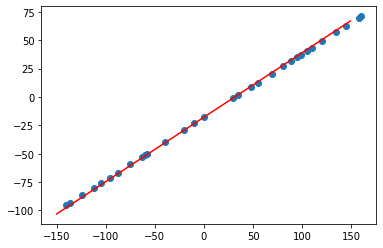

In [ ]:
plt.scatter(df.F, df.C)
plt.plot(x_check, y_pred, c='r')

In [ ]:
df = pd.read_csv('http://hackingpython.pl/ML2206/Day01/otodom.csv')
df = df[df.Cena<800E3]

In [ ]:
df.head()

,ID,Cena,Liczba_Pięter,Liczba_Pokoi,Pietro,Powierzchnia,Rok_Budowy
2,3Bdli,640659,4,3,2,64.13,2019
3,46q1p,410000,12,2,4,36.30,1975
4,468dI,415900,10,2,6,31.06,1974
5,46jEE,550000,4,3,3,51.00,1976
6,46oJo,444000,4,2,1,44.80,2003


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:, 2:]
y = df.Cena

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# tworzenie sieci
model = Sequential()  
model.add( Dense(1204, input_shape=[5], activation='relu') )   # warstwa wejściowa 
model.add( Dense(258, activation='relu') ) # warstwa ukryta  nr 1
model.add( Dense(128, activation='relu') )  # warstwa ukryta  nr 2
model.add( Dense(1)) # warstwa wyjściowa 

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae','mse'])

In [ ]:
result = model.fit(X_train, y_train, epochs=150, verbose=0)

In [ ]:
result.history.keys()

dict_keys(['loss', 'mae', 'mse'])

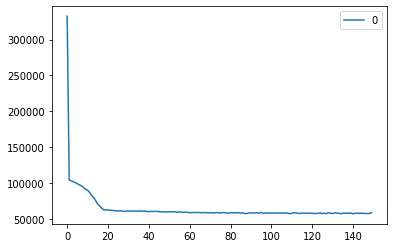

In [ ]:
pd.DataFrame(result.history['mae']).plot()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3776562813119293